

### Introduction

This document describes a convolutional neural network model designed for binary classification tasks, specifically distinguishing between two shoe types: boots or sandals. I found this dataset of 10,000 shoes, evenly distributed between boots and sandals through Kaggle. I created a function that would read in the images and create the numpy arrays. The structure is inspired by the strucutre Tim Rogers displayed in their demo, but I went ahead and added an additional convolutional layer, max pooling layer, adjusted the hidden units, added dropout layer, experimented and adjusted the epochs and batch sizes,and changed the activation of the output layer to sigmoid considering my problem was a binary classifcation problem.

### Dataset:
https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images?resource=download





In [2]:
#To connect to your google drive, run this cell, follow link, then copy-paste authorization code from link to pop-up box

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Below is a "magic" command, indicated by percent sign, which works even though it is not a Python function:
%cd /content/gdrive/MyDrive/Colab Notebooks/755_dcnn

#Following command preceded by ! gets sent directly to the shell on your cloud machine, rather than to the Python interpreter
!ls

/content/gdrive/MyDrive/Colab Notebooks/755_dcnn
boot  Sandal


In [4]:
#Essentials
import os

import numpy as np
import pandas as pd
#Tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
#Plotting
from matplotlib import pyplot as plt

# Code for creating raining/testing pattern.

I created a function to read in the images and labels according to a label dictionary. I have it well documented below what each line of code is doing.

In [19]:
def load_images_and_labels(dir, target_size=(64, 64)):
    images = [] #makes empty images list
    labels = [] #makes empty label list
    label_dict = { "boot": 0, "Sandal": 1} #makes dictinary for each type of shoe and corresponding numeric value. Add more once new data is uploaded to Drive with appropriate folder names



  # creating a image to label
    for label in label_dict:  #for loop to go through each label. each key in the label_dict
        folder = os.path.join(dir, label) #combine the dir with the label--> folder containing images for that label. example boot or Sandal
        for file in os.listdir(folder): #now that we are in the correct folder, for loop through folder for a label and get that path to get the image
            img_path = os.path.join(folder, file)
            img = load_img(img_path, target_size=target_size, color_mode='grayscale')  #loading image, making sure the size is appropriate, might adjust to see how that affects training. 'rgb' if I want to keep it colored
            img_array = img_to_array(img) #into array
            images.append(img_array) #image is added into image list
            labels.append(label_dict[label]) #label is added to labels list

    return np.array(images), np.array(labels) #lists of images and labels are converted into numpy arrays

# path to my directory that holds my data
directory = '/content/gdrive/MyDrive/Colab Notebooks/755_dcnn'

# load data
x, y = load_images_and_labels(directory) #x= images, y =labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=12) #Splits the x and y training and test sets randomly in a 90/10 split

Below, I am making sure my data/images were read in correctly by checking the shapes of both the training and testing sets along with the labels.

In [20]:
 # Verify shapes of input data and labels
print("Shapes of input data and labels:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Verify unique labels in the training set
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)

# Verify shapes of test data and labels
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Verify unique labels in the test set
unique_labels_test = np.unique(y_test)
print("Unique labels in y_test:", unique_labels_test)


Shapes of input data and labels:
x_train shape: (9000, 64, 64, 1)
y_train shape: (9000,)
Unique labels in y_train: [0 1]
x_test shape: (1000, 64, 64, 1)
y_test shape: (1000,)
Unique labels in y_test: [0 1]


In [39]:

# One-hot encode the labels was not necessary in my binary problem
#y_train = tf.keras.utils.to_categorical(y_train)
#y_test = tf.keras.utils.to_categorical(y_test)

# Verify the shape of one-hot encoded labels
#print("Shape of one-hot encoded y_train:", y_train.shape)
#print("Shape of one-hot encoded y_test:", y_test.shape)


Shape of one-hot encoded y_train: (9000, 2, 2)
Shape of one-hot encoded y_test: (1000, 2, 2)


In [21]:
x_train.dtype #valuesar integers- convert to floats

dtype('float32')

In [22]:
y_train.dtype #checking the data type for the y train

dtype('int64')

In [23]:
#Normalizing
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#Now check the data type again after normalizing
x_train.dtype
x_test.dtype


dtype('float32')

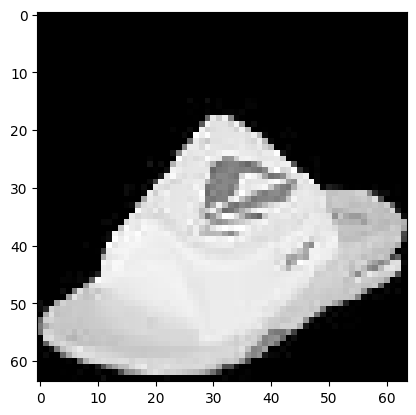

In [24]:
#Plotting the first image in x train
#plt.savefig('')
plt.imshow(x_train[0,:,:], cmap= 'gray_r')

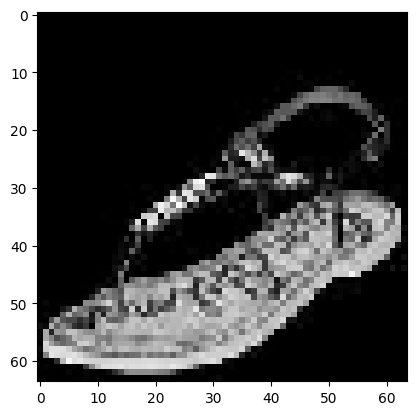

In [25]:
#Plotting another image in the training set
plt.imshow(x_test[0,:,:,:,], cmap= 'gray_r')

In [26]:
#Value of first label
y_test[0:5]

array([1, 1, 0, 1, 1])

# Model architecture/structure.

The architecture of this CNN is made to handle grayscale images of size 32x32 pixels. I decided on 64x64 to save time and be more efficient in the training process since I had a lot of images and there would not be enough RAM in order to run a model with larger images. The model consists of three convolutional layers, each followed by max-pooling layers. The 3D output from the convolutional layers is flattened into a 1D vector to be fed into the dense layers in the flatten layer. I then have a hidden layer with 100 units and LeakyReLU activation. Followed by a dropout layer with a rate of 0.5 to prevent overfitting.Lastly, the output layer is a dense layer with a single unit and sigmoid activation since this is a binary classifcation problem.



In [27]:
num_classes = 1 #Number of output categories/units
input_shape = (64, 64, 1) #Shape of inputs

# Build Model
minput = layers.Input(shape=input_shape)
mgraph = layers.Conv2D(32, kernel_size=(3, 3), activation=layers.LeakyReLU(alpha=0.01), name='conv_lay1')(minput)
mgraph = layers.MaxPooling2D(pool_size=(2, 2), name='mpool1')(mgraph)

mgraph = layers.Conv2D(64, kernel_size=(3, 3), activation=layers.LeakyReLU(alpha=0.01), name='conv_lay2')(mgraph)
mgraph = layers.MaxPooling2D(pool_size=(2, 2), name='mpool2')(mgraph)

mgraph = layers.Conv2D(128, kernel_size=(3, 3), activation=layers.LeakyReLU(alpha=0.01), name='conv_lay3')(mgraph)
mgraph = layers.MaxPooling2D(pool_size=(2, 2), name='mpool3')(mgraph)

flatten = layers.Flatten()(mgraph)

hidden = layers.Dense(100, activation=layers.LeakyReLU(alpha=0.01), name="hidden_lay")(flatten)

hidden = layers.Dropout(0.5)(hidden)  # Add dropout for regularization

moutput = layers.Dense(1, activation='sigmoid')(hidden)


dcnn1 = tf.keras.models.Model(minput, moutput)
#Table of the structure
dcnn1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv_lay1 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 mpool1 (MaxPooling2D)       (None, 31, 31, 32)        0         
                                                                 
 conv_lay2 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 mpool2 (MaxPooling2D)       (None, 14, 14, 64)        0         
                                                                 
 conv_lay3 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 mpool3 (MaxPooling2D)       (None, 6, 6, 128)         0   

# Compiling the Model and Training

The model is compiled with the Adam optimizer and binary cross-entropy loss, which is standard for binary classification tasks. The accuracy metric is used to evaluate model performance during training and validation. No more than 10 epochs were need in this problem. Further training only led to a decrease in accuracy.

This CNN model architecture is designed to be simple yet effective for binary image classification tasks. The model can be further tuned and adapted for different datasets and specific use cases, but overall for this simple task, it performed well.

In [28]:
dcnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
batch_size = 100
nepochs = 10

H = dcnn1.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = nepochs, validation_data = (x_test, y_test))

Epoch 1/10
90/90 [==============================] - 74s 807ms/step - loss: 0.2069 - accuracy: 0.9116 - val_loss: 0.0597 - val_accuracy: 0.9750
Epoch 2/10
90/90 [==============================] - 76s 852ms/step - loss: 0.0771 - accuracy: 0.9731 - val_loss: 0.0478 - val_accuracy: 0.9820
Epoch 3/10
90/90 [==============================] - 73s 805ms/step - loss: 0.0611 - accuracy: 0.9797 - val_loss: 0.0563 - val_accuracy: 0.9810
Epoch 4/10
90/90 [==============================] - 75s 826ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0350 - val_accuracy: 0.9870
Epoch 5/10
90/90 [==============================] - 69s 771ms/step - loss: 0.0377 - accuracy: 0.9868 - val_loss: 0.0341 - val_accuracy: 0.9890
Epoch 6/10
90/90 [==============================] - 73s 812ms/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 0.0349 - val_accuracy: 0.9890
Epoch 7/10
90/90 [==============================] - 68s 751ms/step - loss: 0.0237 - accuracy: 0.9932 - val_loss: 0.0453 - val_accuracy: 0.9870

# Performance in Test Set
I was able to train the model to a 99% accuracy in the test set.

In [29]:

# Evaluate the model on the test set
loss, accuracy = dcnn1.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

32/32 [==============================] - 2s 56ms/step - loss: 0.0313 - accuracy: 0.9910
Test Loss: 0.03128991276025772, Test Accuracy: 0.9909999966621399


# The Learning Trajectory

Here I plotted the loss of the training and validation/test over the training epochs to be able to see whether it continues to go down and compare them to one another. Or whether I can see any bias or variance issues.

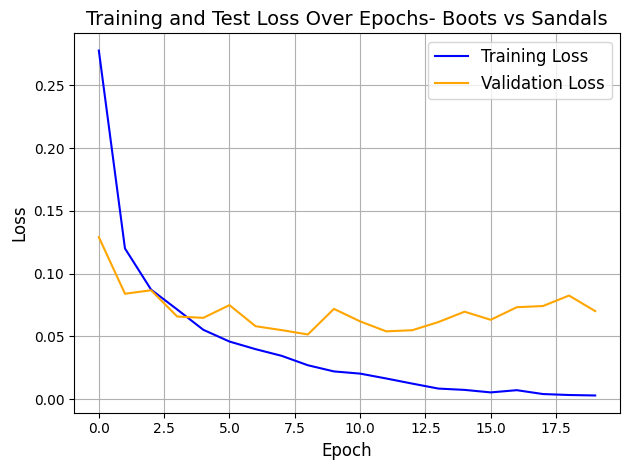

In [12]:
# Plot training, validation, and test loss
plt.plot(H.history['loss'], label='Training Loss', color='blue', linestyle='-')
plt.plot(H.history['val_loss'], label='Validation Loss', color='orange', linestyle='-')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Test Loss Over Epochs- Boots vs Sandals', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping label
plt.show()

# Internal Activation Patterns

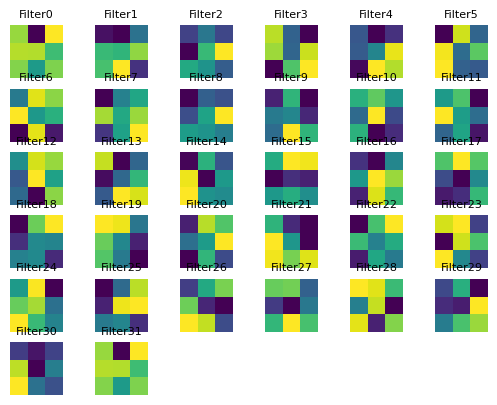

In [13]:
tmp = dcnn1.layers[1].get_weights()
fig = plt.figure()
#plt.subplots(6,6)

for i in range(32):
  fig.add_subplot(6,6,i+1)
  plt.imshow(tmp[0][:,:,0,i])
  plt.axis('off')
  plt.title("Filter" + str(i), fontsize=8)

fig.show()

plt.imshow(tmp[0][:,:,0,0])

# Examples of the Images and their Corresponding Labels

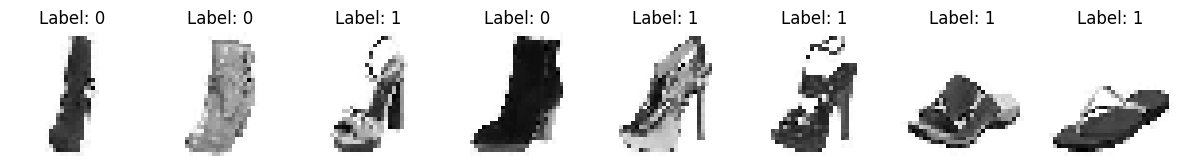

In [17]:
num_images = 8
# Plot the images along with their labels
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Label: {y_test[i]}')
    plt.axis('off')
plt.show()